<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

# 과제: 고객 신용도 예측


<img src = "https://github.com/Jangrae/img/blob/master/credit-card.jpg?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 코드 셀에는 주석을 충분히 답니다.
- 마크다운 셀을 사용해 작업 한 내용을 충분히 설명합니다.
- 입력을 요구한 (의견) 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 다양한 방법으로 데이터를 탐색하고 결과를 정리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.
- 더 나은 성능을 보이도록 특정 모델을 튜닝합니다.

**3) 데이터 정보**

<img src = "https://github.com/Jangrae/img/blob/master/credit.png?raw=true" width=550 align="left"/>

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/credit_NA.csv'
path = 'https://bit.ly/CreditFile'
data = pd.read_csv(path)

# 2.데이터 이해

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

## 2.1.기본 정보 확인

- 데이터에 대한 기본 정보를 우선 확인합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [3]:
# 데이터 앞부분 확인
data.head()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28.0,2,1,3,1,1
1,1,2,9,2,0,276,3,4,4,1,22.0,1,1,2,1,1
2,1,1,18,4,2,1049,2,2,4,2,21.0,1,1,3,1,1
3,1,1,24,4,1,6419,5,2,4,4,NaN,3,2,4,2,1
4,1,3,12,2,2,1424,5,2,4,1,55.0,2,1,4,2,1


In [4]:
# 1 : 신용도가 좋다, 0 : 신용도가 좋지 않다
data['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [5]:
# 데이터 뒷부분 확인
data.tail()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
995,1,1,12,2,3,1680,5,4,1,1,35.0,2,1,3,1,1
996,1,1,42,2,2,7882,4,3,4,2,45.0,3,1,3,1,1
997,0,2,54,0,9,15945,2,3,4,4,58.0,1,1,3,2,1
998,1,2,15,4,3,1537,5,3,4,1,50.0,2,2,3,2,1
999,0,3,12,2,0,1386,3,2,2,2,26.0,2,1,3,1,1


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Creditability   1000 non-null   int64  
 1   AccountBalance  1000 non-null   int64  
 2   CreditDuration  1000 non-null   int64  
 3   Payment         1000 non-null   int64  
 4   Purpose         1000 non-null   int64  
 5   CreditAmount    1000 non-null   int64  
 6   Employment      1000 non-null   int64  
 7   SexMarital      1000 non-null   int64  
 8   CurrentAddress  1000 non-null   int64  
 9   MostValuable    1000 non-null   int64  
 10  Age             983 non-null    float64
 11  ApartmentType   1000 non-null   int64  
 12  NoCredits       1000 non-null   int64  
 13  Occupation      1000 non-null   int64  
 14  Telephone       1000 non-null   int64  
 15  ForeignWorker   1000 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 125.1 KB


**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [7]:
# 기초통계정보 확인 
data.describe()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,983.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.54500,2.828000,3271.24800,3.384000,2.68200,2.845000,2.358000,35.495422,1.928000,1.407000,2.904000,1.404000,1.037000
std,0.458487,0.835589,12.058814,1.08312,2.744439,2822.75176,1.208306,0.70808,1.103718,1.050209,11.302980,0.530186,0.577654,0.653614,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,3.000000,2.00000,2.000000,1.000000,27.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,3.000000,3.00000,3.000000,2.000000,33.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,4.00000,3.000000,3972.25000,5.000000,3.00000,4.000000,3.000000,42.000000,2.000000,2.000000,3.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,4.00000,4.000000,4.000000,75.000000,3.000000,4.000000,4.000000,2.000000,2.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [8]:
# 결측치 확인
data.isna().sum() # Age 열 17개 결측치 확인

Creditability      0
AccountBalance     0
CreditDuration     0
Payment            0
Purpose            0
CreditAmount       0
Employment         0
SexMarital         0
CurrentAddress     0
MostValuable       0
Age               17
ApartmentType      0
NoCredits          0
Occupation         0
Telephone          0
ForeignWorker      0
dtype: int64

## 2.2.데이터 상세 확인(5가지 이상 추가)

- 데이터를 **충분히 이해할 수 있도록** 집계와 시각화를 통해 살펴봅니다.
- 이후 모델링을 진행해야 하니 분석에 너무 많은 시간을 할애해서는 안됩니다.
- 분석 결과를 관련 코드 셀 아래에 정리합니다.

**1) Target 값 분포 확인**

- Target 변수인 Creditability 변수의 값 분포를 확인합니다.

In [9]:
# 번주값과 그 값의 개수 확인
target = 'Creditability'
data[target].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

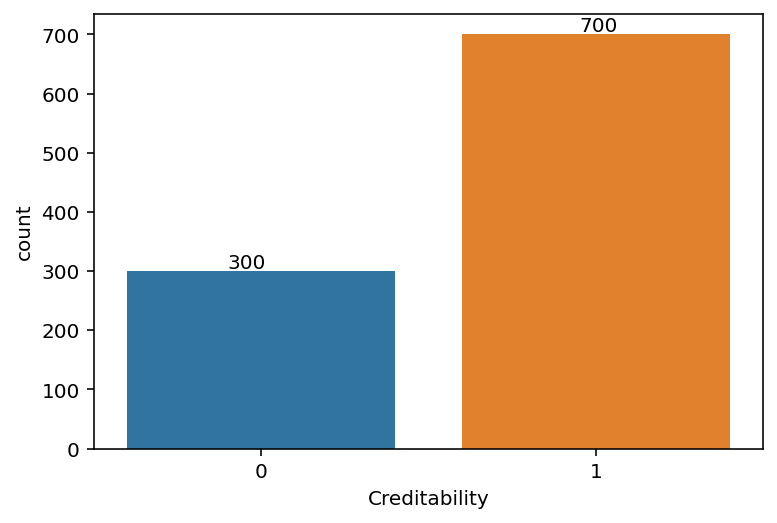

In [10]:
# Attrition 값 분포
cnt = data[target].value_counts()
sns.countplot(data[target])
plt.text(0.95,cnt.values[0]+5,cnt.values[0])
plt.text(-0.1,cnt.values[1]+5,cnt.values[1])
plt.show()

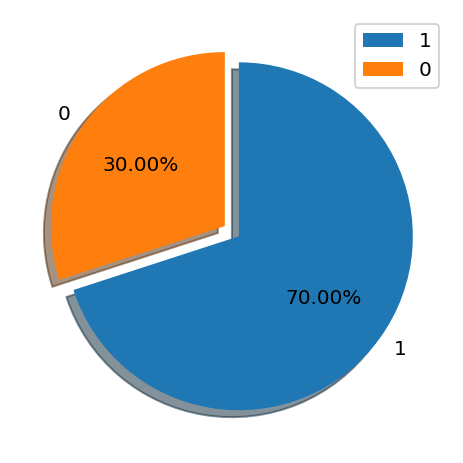

In [11]:
cnt = data[target].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05], shadow=True)
plt.legend()
plt.show()

- Creditability는 고객의 신용도가 좋은지 좋지 않은지를 판단하는 target으로 1은 신용도가 좋음, 0은 신용도가 좋지 않음을 나타낸다.
- 신용도가 좋은 고객이 700명, 좋지 않은 고객이 300명으로 각각 전체 고객의 70% 30%를 차지한다.

**2) 변수 구분**

- Target 변수(Creditability)를 제외한 변수를 범주형과 연속형으로 구분해 목륵을 정리합니다.
- 목록 개수는 필요한 만큼 늘려 사용합니다.

- 범주형 변수 (가변수화 대상)
    -  AccountBalance / 은행 잔고 
    -  Payment / 과거 대출 납입 상태
    -  Purpose / 대출 목적
    -  Employment / 현 직업 근무 기간
    -  SexMarital / 성별, 결혼 상태
    -  CurrentAddress / 현 거주지 거주 기간
    -  MostValuable / 가장 가치있는 자산
    -  ApartmentType / 주거 환경
    -  NoCredits / 현재 총 대출 건수
    -  Occupation / 직업
    -  Telephone / 전화기 소유 여부
    -  ForeignWorker / 외국인 근로자 여부
- 연속형 변수 (정규화 대상)
    -  CreditDuration / 신청한 대출 기간 (월)
    -  CreditAmount / 신청한 대출 금액
    -  Age / 나이

**3) 범주형 변수 확인**

- Target 변수(Creditability)를 제외한 범주형 변수의 범주값과 그 값의 개수를 확인합니다.
- 참고: 대상 변수를 리스트로 선언하고 반복문을 수행해 확인하면 편리합니다.

In [12]:
# 리스트 설정
li = ['AccountBalance', 'Payment', 'Purpose', 'Employment', 'SexMarital', 'CurrentAddress', 'MostValuable', 'ApartmentType', 'NoCredits', 'Occupation', 'Telephone', 'ForeignWorker']

# 반복문을 이용하여 범주형 변수 확인
for i in range (12):
    print(data[li[i]].value_counts())
    print('='*30)



3    457
1    274
2    269
Name: AccountBalance, dtype: int64
2    530
4    293
3     88
1     49
0     40
Name: Payment, dtype: int64
3     280
0     234
2     181
1     103
9      97
6      50
5      22
4      12
10     12
8       9
Name: Purpose, dtype: int64
3    339
5    253
4    174
2    172
1     62
Name: Employment, dtype: int64
3    548
2    310
4     92
1     50
Name: SexMarital, dtype: int64
4    413
2    308
3    149
1    130
Name: CurrentAddress, dtype: int64
3    332
1    282
2    232
4    154
Name: MostValuable, dtype: int64
2    714
1    179
3    107
Name: ApartmentType, dtype: int64
1    633
2    333
3     28
4      6
Name: NoCredits, dtype: int64
3    630
2    200
4    148
1     22
Name: Occupation, dtype: int64
1    596
2    404
Name: Telephone, dtype: int64
1    963
2     37
Name: ForeignWorker, dtype: int64


- 주거 환경 변수에서 rented의 비율이 눈에 띄게 큰 것으로 보아 한국으로 치면 전/월세 거주자가 내 집 마련을 위해 대출을 하기 위한 신용도 측정을 할 수 있을 것으로 추측한다. 마찬가지로 owned인 자가 소유의 고객들은 내 집 마련을 위한 대출이 필요하지 않으므로 rented나 free apartment 보다 적은 비율을 차지하는 것으로 추측할 수 있다.
- 직업 변수를 보면 skilled의 기술직이 가장 많고 unskilled permanent resident의 비숙련 영주권자의 순서로 큰 비율을 차지하고 있으며 executive의 수가 적은 것은 사회 전체적으로 경영진의 수가 적기 때문에 표본 데이터에서도 그 수가 적은 것으로 생각된다.

**4) feature**

- AccountBalance

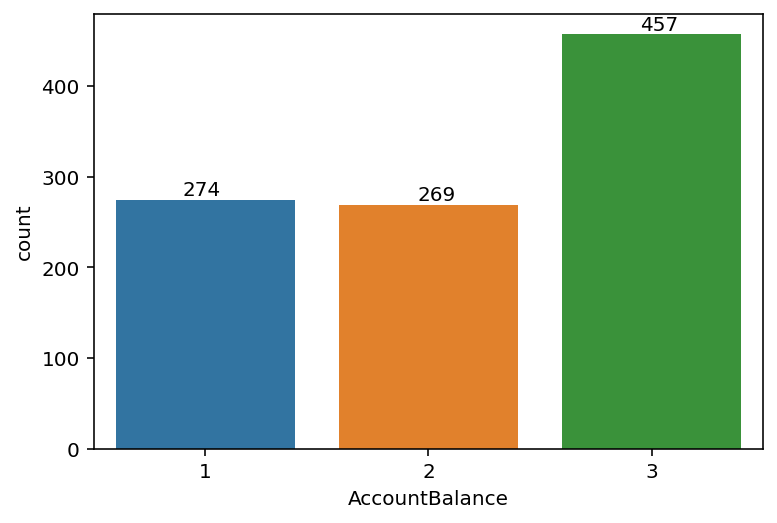

In [93]:
# AccountBalance 값 분포
feature = 'AccountBalance'
cnt = data[feature].value_counts()

sns.countplot(data[feature])
plt.text(1.95,cnt.values[0]+5,cnt.values[0])
plt.text(-0.1,cnt.values[1]+5,cnt.values[1])
plt.text(0.95,cnt.values[2]+5,cnt.values[2])
plt.show()


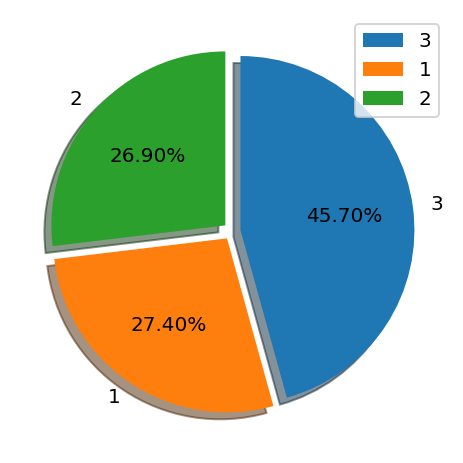

In [94]:
cnt = data[feature].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05, 0.05], shadow=True)
plt.legend()
plt.show()

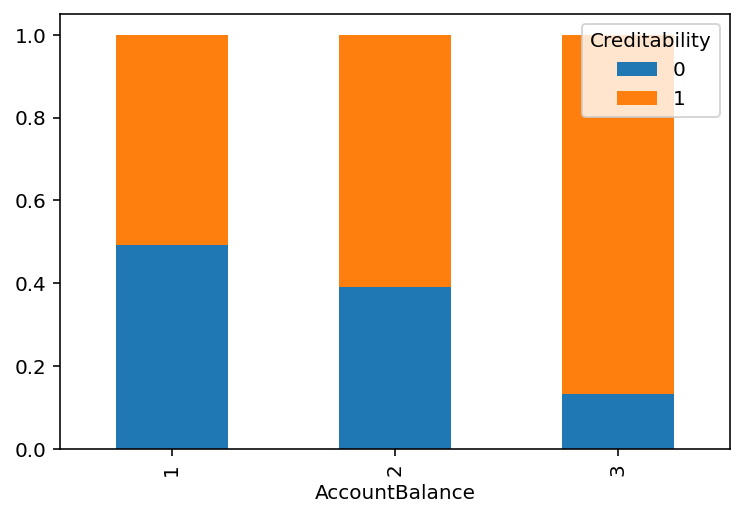

In [101]:
temp = pd.crosstab(data[feature], data['Creditability'] , normalize = 'index')
temp.plot.bar(stacked=True)
plt.show()

- AccountBalance 은행 잔고 변수를 볼 때 3.some balance 의 비율이 45.7%로 어느정도 잔고를 가지고 있는 고객들의 비율이 가장 많고 잔고를 가지고 있는 3 고객들의 신용도가 높을 것으로 추측된다.
- 1. no account 의 계좌를 가지고 있지 않은 고객들을 대상으로 계좌를 만들어주고 자사의 고객으로 만드는 것도 필요할 것으로 생각된다.

**5) feature**

- Payment

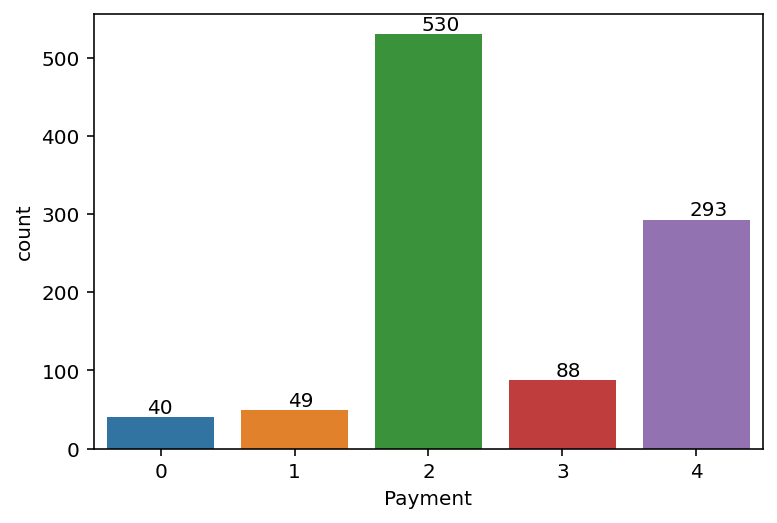

In [102]:
# Payment 값 분포
feature = 'Payment'
cnt = data[feature].value_counts()
sns.countplot(data[feature])
plt.text(1.95,cnt.values[0]+5,cnt.values[0])
plt.text(3.95,cnt.values[1]+5,cnt.values[1])
plt.text(2.95,cnt.values[2]+5,cnt.values[2])
plt.text(0.95,cnt.values[3]+5,cnt.values[3])
plt.text(-0.1,cnt.values[4]+5,cnt.values[4])

plt.show()

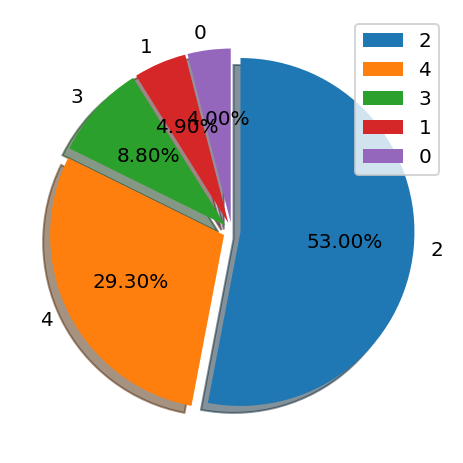

In [103]:
cnt = data[feature].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05, 0.05, 0.05, 0.05], shadow=True)
plt.legend()
plt.show()

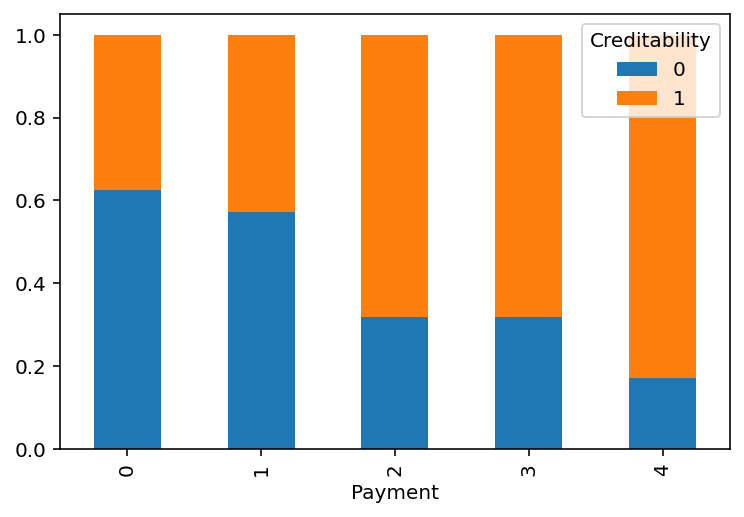

In [104]:
temp = pd.crosstab(data[feature], data['Creditability'] , normalize = 'index')
temp.plot.bar(stacked=True)
plt.show()

- 과거 대출을 모두 상환한 2, 3, 4의 비율이 91.1%로 대부분의 고객들이 대출을 상환했고 대출을 모두 상환한 고객들의 신용도가 그렇지 그렇지 못한 고객들의 비해 신용도가 높을 것이라고 생각한다.
- 0 대출 상환이 미뤄진 고객들에 대해서는 신용도 하락 조정이 필요할 수 있다.

**6) feature**

- Employment

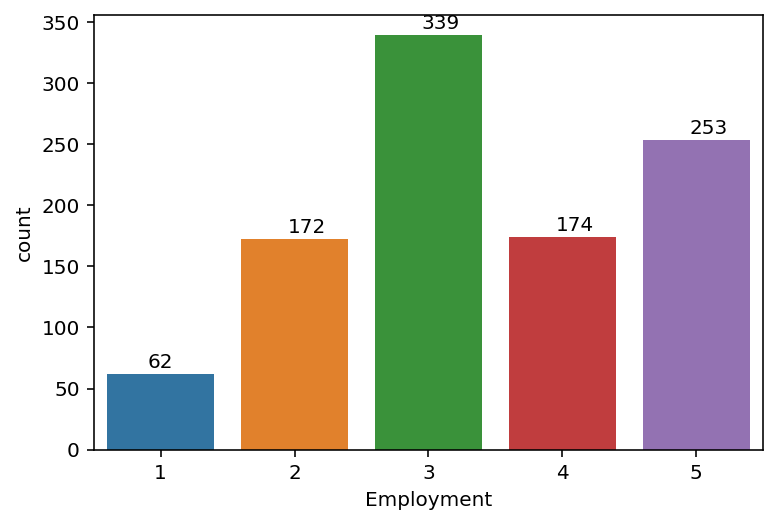

In [105]:
# Employment 값 분포
feature = 'Employment'
cnt = data[feature].value_counts()
sns.countplot(data[feature])
plt.text(1.95,cnt.values[0]+5,cnt.values[0])
plt.text(3.95,cnt.values[1]+5,cnt.values[1])
plt.text(2.95,cnt.values[2]+5,cnt.values[2])
plt.text(0.95,cnt.values[3]+5,cnt.values[3])
plt.text(-0.1,cnt.values[4]+5,cnt.values[4])

plt.show()

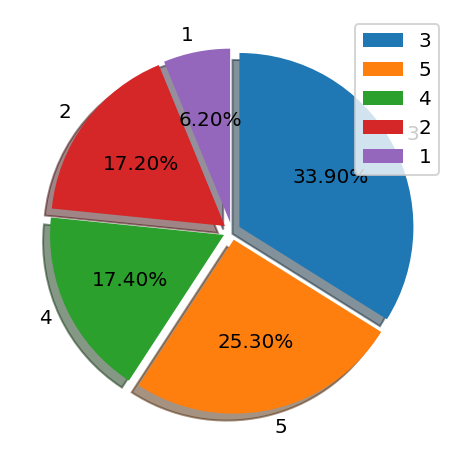

In [106]:
cnt = data[feature].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05, 0.05, 0.05, 0.05], shadow=True)
plt.legend()
plt.show()

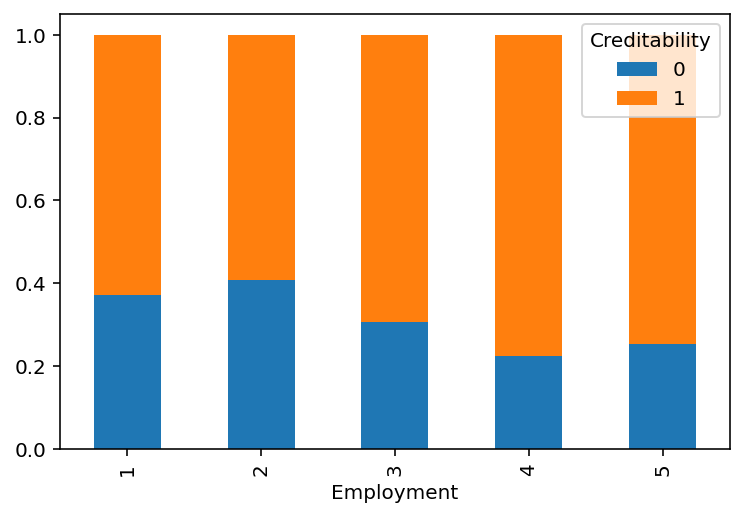

In [107]:
temp = pd.crosstab(data[feature], data['Creditability'] , normalize = 'index')
temp.plot.bar(stacked=True)
plt.show()

- 현 직업 근무 기간은 고정적으로 수입이 발생하는 것을 방증하는 요소로 작용하며 대출금을 기한에 맞춰 상환할 수 있는 능력을 보여주는 기준이 될 수 있다. 
- 그에 따라 근무 기간이 길수록 신용도에 차등을 줄 수 있을 것으로 보인다.

**7) feature**

- NoCredits

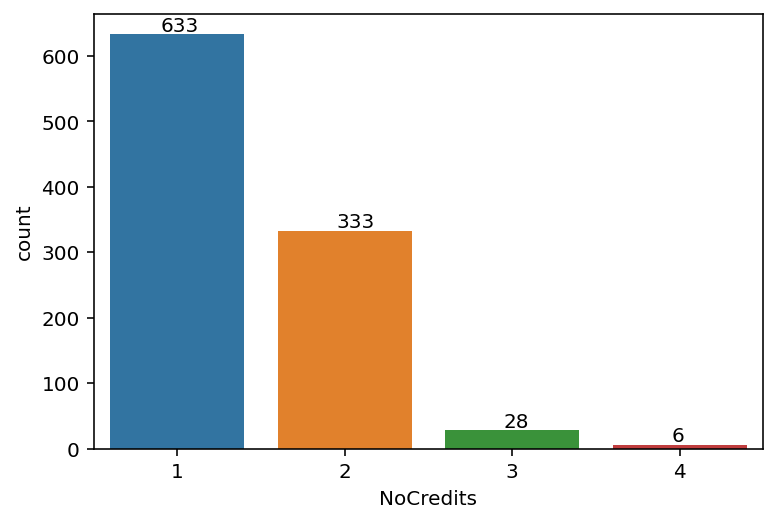

In [108]:
# NoCredits 값 분포
feature = 'NoCredits'
cnt = data[feature].value_counts()
sns.countplot(data[feature])
plt.text(-0.1,cnt.values[0]+5,cnt.values[0])
plt.text(0.95,cnt.values[1]+5,cnt.values[1])
plt.text(1.95,cnt.values[2]+5,cnt.values[2])
plt.text(2.95,cnt.values[3]+5,cnt.values[3])

plt.show()

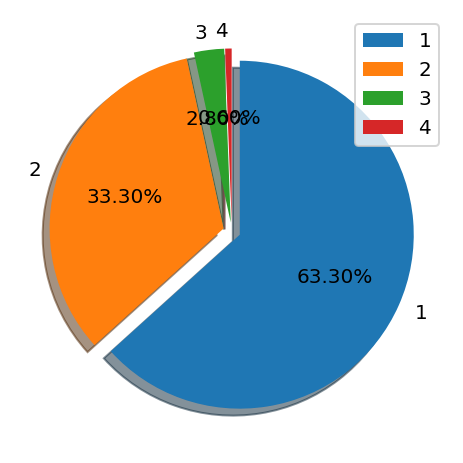

In [109]:
cnt = data[feature].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05, 0.05, 0.05], shadow=True)
plt.legend()
plt.show()

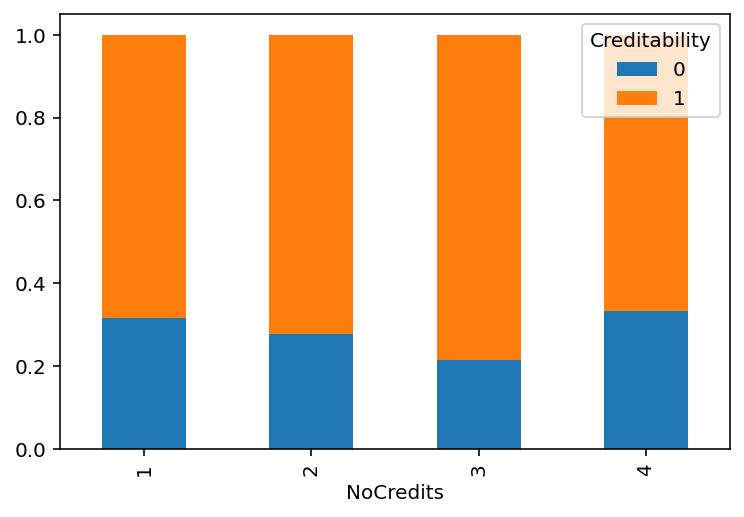

In [110]:
temp = pd.crosstab(data[feature], data['Creditability'] , normalize = 'index')
temp.plot.bar(stacked=True)
plt.show()

- 현재 총 대출 건수는 단일 지표만으로 판단할 수 없다고 생각한다. 대출 건수 뿐 아니라 대출 금액과 함께 총 대출 금액으로 판단하는 것도 좋은 방법이라고 생각한다.
- 다만, 대출 할 때마다 다른 기관에서도 이를 검증하고 대출을 해준 것으로 생각해보면 대출 건수가 많은 고객들의 신용도가 높기 때문에 다른 기관에서도 고객을 믿고 대출을 해줄 수도 있는 가능성도 간과해서는 안될 부분이다.

**8) feature**

- ForeignWorker

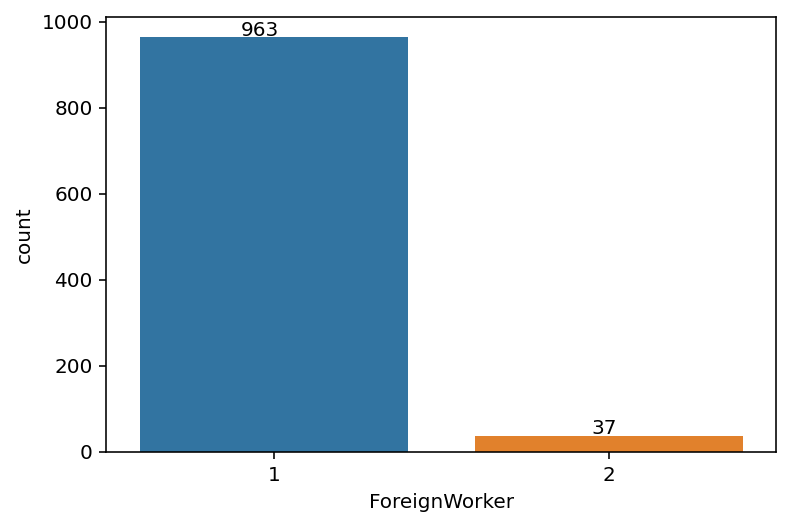

In [111]:
# ForeignWorker 값 분포
feature = 'ForeignWorker'
cnt = data[feature].value_counts()
sns.countplot(data[feature])
plt.text(-0.1,cnt.values[0]+5,cnt.values[0])
plt.text(0.95,cnt.values[1]+5,cnt.values[1])
plt.show()

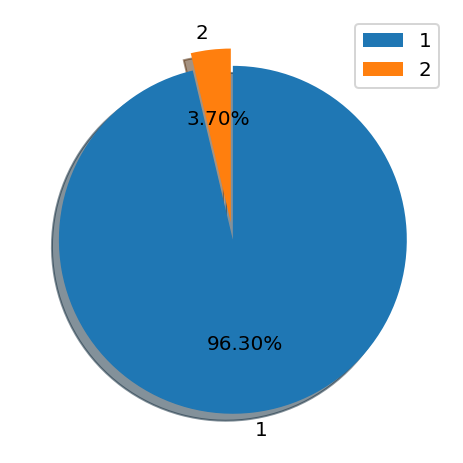

In [112]:
cnt = data[feature].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05], shadow=True)
plt.legend()
plt.show()

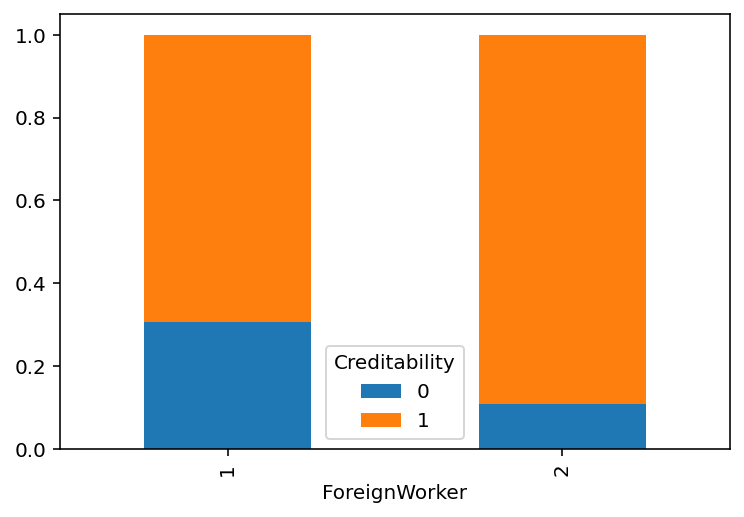

In [113]:
temp = pd.crosstab(data[feature], data['Creditability'] , normalize = 'index')
temp.plot.bar(stacked=True)
plt.show()

- 외국인 근로자의 신용도와 대출 가능 여부를 책정할 때에는 자국 근로자보다 더 엄격한 잣대를 적용해야 할 수도 있다고 생각한다. 외국인 근로자라는 이유만으로 제한을 둬서는 안되지만 외국인 근로자 고객의 대출 상환 능력 혹은 직업 근무기간, 소득 등 여러가지 변수들을 함께 고려해야 한다.

**8) feature**

- CreditAmount

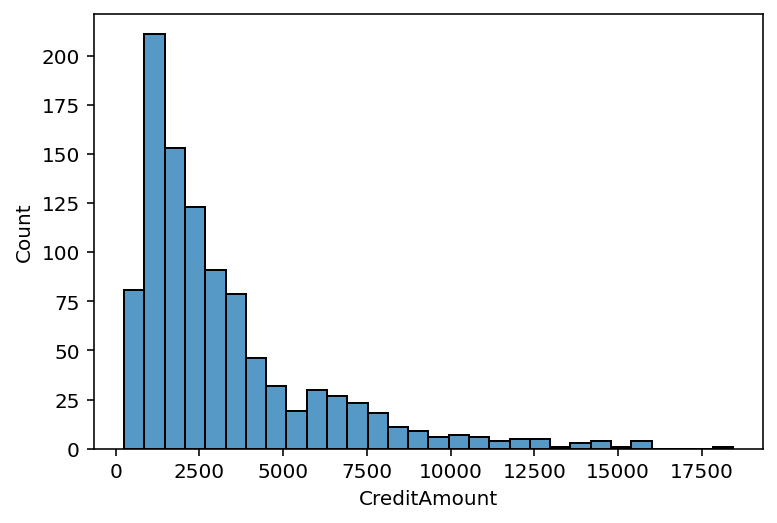

In [87]:
# CreditAmount --> Attrition 값 분포
feature = 'CreditAmount'
sns.histplot(x=data[feature], bins=30)
plt.show()

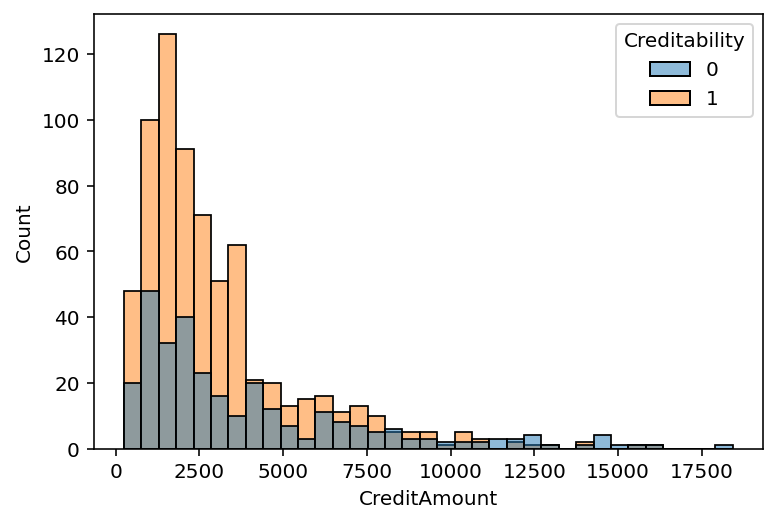

In [88]:
sns.histplot(x=data[feature], data = data, hue = data['Creditability'])
plt.show()

 * 신청한 대출 금액이 적은 구간에서 신용도가 좋은 고객들의 비율이 더 크다.
 * 비교적 소액을 대출하는 고객들이 성실히 상환하여 신용도가 상승한 것으로 추측할 수 있다.

**9) feature**

- CreditDuration

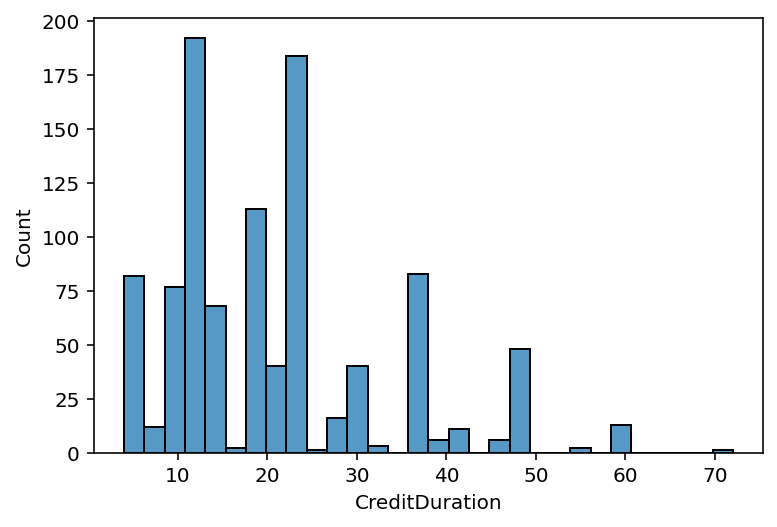

In [89]:
# CreditDuration --> Attrition 값 분포
feature = 'CreditDuration'
sns.histplot(x=data[feature], bins=30)
plt.show()

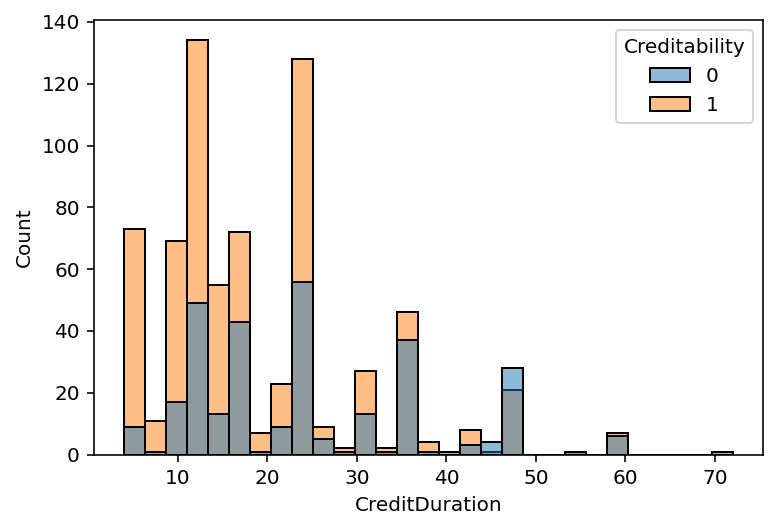

In [90]:
sns.histplot(x=data[feature], data = data, hue = data['Creditability'])
plt.show()

 * 신청한 대출 기간이 짧은 구간에서 신용도가 좋은 고객들의 비율이 더 크다.
 * 은행 입장에서 대출 신청 기간에 따라 금리를 다르게 적용하여 대출이자에 대한 수익을 얻을 수 있다.

### 변수별 상관 분석

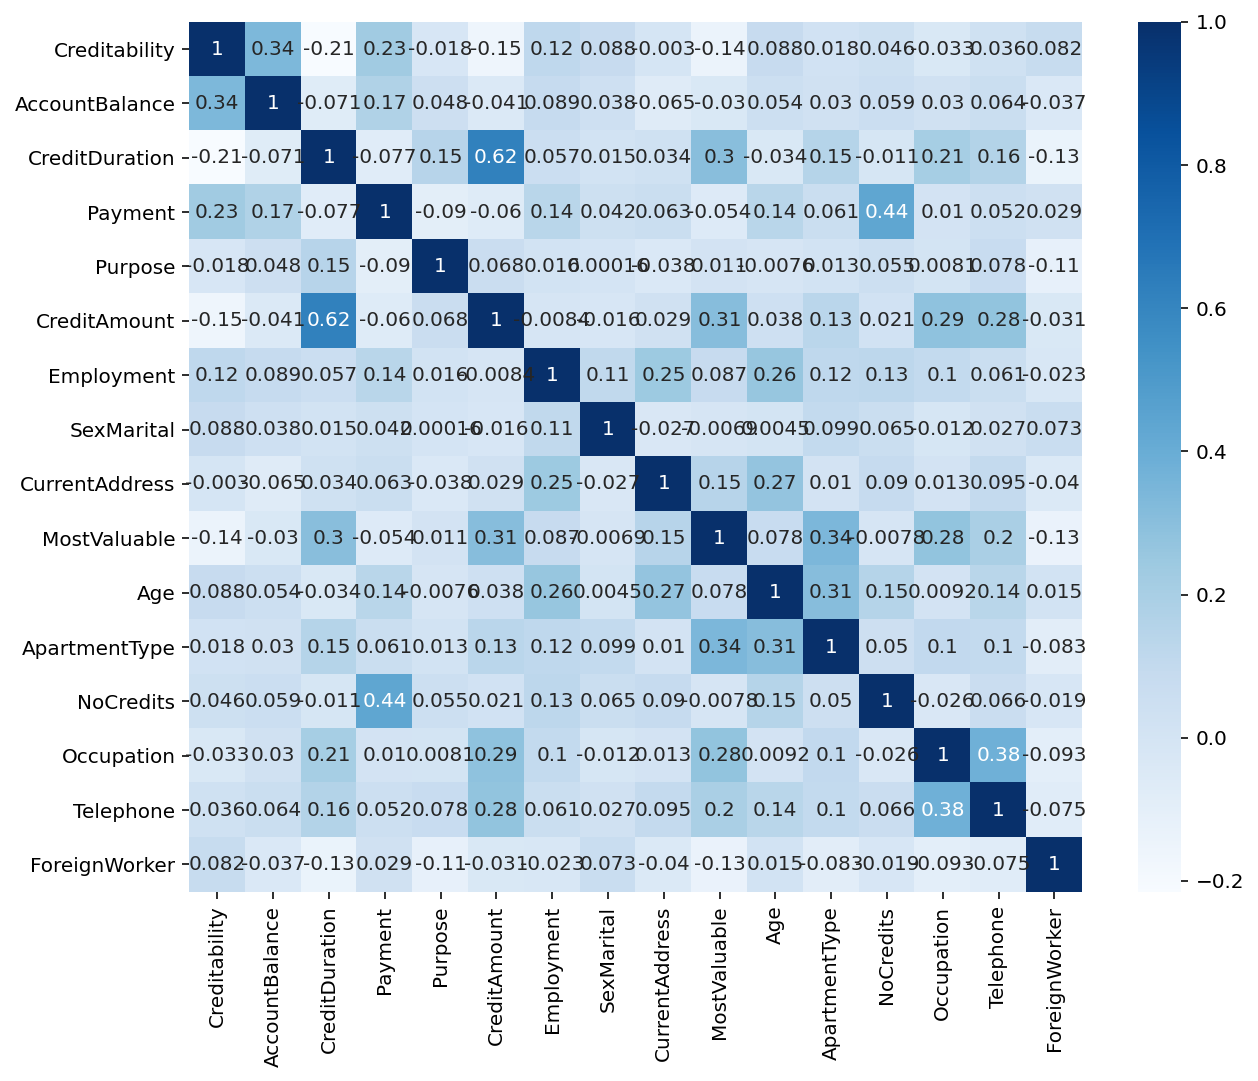

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 결측치 처리**

- Age 변수에 대한 결측치 처리를 진행합니다.
- 데이터 양이 많지 않으니 제거 보다는 채우기를 권고합니다.

In [25]:
# 결측치 처리
# 나이의 평균값으로 결측치 채우기
data['Age'].fillna(data['Age'].mean(),inplace=True)

# 결측치 확인
data.isna().sum()

Creditability     0
AccountBalance    0
CreditDuration    0
Payment           0
Purpose           0
CreditAmount      0
Employment        0
SexMarital        0
CurrentAddress    0
MostValuable      0
Age               0
ApartmentType     0
NoCredits         0
Occupation        0
Telephone         0
ForeignWorker     0
dtype: int64

**2) x, y 분리**

- Target을 선정하고 x, y를 분리합니다.

In [26]:
# target 확인
target = 'Creditability'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**3) 가변수화**

- 앞에서 범주형으로 구분한 변수에 대해 가변수화를 수행합니다.
- 참고: 이미 x, y로 분리가 되었으니 x에 대한 가변수화를 수행해야 합니다.


In [27]:
# 가변수화
cols = ['AccountBalance', 'Payment', 'Purpose', 'Employment', 'SexMarital', 'CurrentAddress', 'MostValuable', 'ApartmentType', 'NoCredits', 'Occupation', 'Telephone', 'ForeignWorker']
x = pd.get_dummies(x, columns=cols, drop_first=True)

# 확인
data.head()



,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28.000000,2,1,3,1,1
1,1,2,9,2,0,276,3,4,4,1,22.000000,1,1,2,1,1
2,1,1,18,4,2,1049,2,2,4,2,21.000000,1,1,3,1,1
3,1,1,24,4,1,6419,5,2,4,4,35.495422,3,2,4,2,1
4,1,3,12,2,2,1424,5,2,4,1,55.000000,2,1,4,2,1


**4) 정규화**

- 앞에서 연속형으로 구분한 변수에 대해 정규화를 진행합니다.

In [28]:
# 정규화
cols=['CreditDuration', 'CreditAmount', 'Age']
x[cols] = (x[cols] - x[cols].min()) / (x[cols].max() - x[cols].min())

# 확인
x.head()



,CreditDuration,CreditAmount,Age,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Payment_4,Purpose_1,...,ApartmentType_2,ApartmentType_3,NoCredits_2,NoCredits_3,NoCredits_4,Occupation_2,Occupation_3,Occupation_4,Telephone_2,ForeignWorker_2
0,0.294118,0.054969,0.160714,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.073529,0.001431,0.053571,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.205882,0.043964,0.035714,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.294118,0.339441,0.294561,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,1,1,0
4,0.117647,0.064598,0.642857,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


**5) 학습용, 평가용 데이터 분리**


- 모델링을 위해 학습용, 평가용 데이터를 분리합니다.

In [29]:

# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)


# 4.모델링

- 다음 알고리즘을 사용해 모델링을 진행합니다.
    - Logistic Regression
    - KNN
    - Decision Tree
    - Random Forest
    - XGBoost
- Classification Report를 사용해 성능을 평가합니다.
- 성능 평가 결과 아래에 성능에 대한 의견을 정리합니다.
- 혼동행렬, 변수 중요도 등을 시각화해 모델을 심도있게 탐색합니다.

## 4.1.Logistic Regression

### 4.1.1.모델링

- Logistic Regression 알고리즘을 사용해 모델링을 진행합니다.

In [30]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
# 2단계: 선언하기
model = LogisticRegression()

In [32]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [34]:
# 5단계 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 48  49]
 [ 31 172]]
              precision    recall  f1-score   support

           0       0.61      0.49      0.55        97
           1       0.78      0.85      0.81       203

    accuracy                           0.73       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.72      0.73      0.73       300



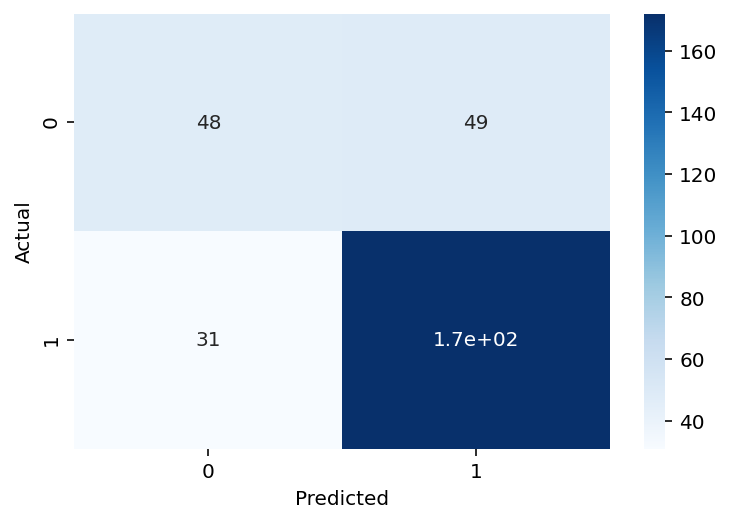

In [35]:
# 혼동행렬 시각화
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
# Logistic Regression 모델의 파라미터
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
# 성능 정보 수집
from sklearn.metrics import accuracy_score

score={}
score['LogisticRegression'] = accuracy_score(y_test, y_pred)

- 범주형 데이터인 경우에는 일반적인 선형회귀분석이 적합하지 않아 Logistic Regression 분석을 실시하였다.
- 1일 때의 recall은 0.85이지만 0일 때의 recall은 0.49로 큰 차이가 나는 것을 볼 수 있다.
- accuracy 정확도는 0.73이다.

### 4.1.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 가장 높은 accuracy**

- accuracy가 다른 모델에 비해 가장 높게 측정되었다.
    - 다른 모델 들에 비해 precision과 recall이 높고, 전체 accuracy 또한 높게 측정 되었다.
    - 앙상블 모델보다 높게 나온것은 앙상블 모델이 더 정확하다는 생각이 적절한 모델 설정이 중요하다고 생각이 바뀌게 될 법하다.

**2) 0에 대한 불균형 데이터**

- 범주형 데이터의 수를 비교하여 한 쪽이 다른 한 쪽에 비해 현격히 차이가 클 때 발생하는 데이터
    - 1의 데이터는 700개, 0의 데이터는 300개로 2배 이상의 차이가 있다.
    - 이로 인해 0에 대한 precision과 recall이 낮게 측정된 것으로 보인다.
    - Over Sampling 혹은 Under Sampling 을 이용하여 불균형 데이터의 문제를 해결하고 다시 측정해 볼 필요가 있다.

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘을 사용해 모델링을 진행합니다.

In [38]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
# 2단계: 선언하기
model = DecisionTreeClassifier(random_state=2022)

In [40]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [41]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [42]:
# 5단계: 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 45  52]
 [ 57 146]]
              precision    recall  f1-score   support

           0       0.44      0.46      0.45        97
           1       0.74      0.72      0.73       203

    accuracy                           0.64       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.64      0.64      0.64       300



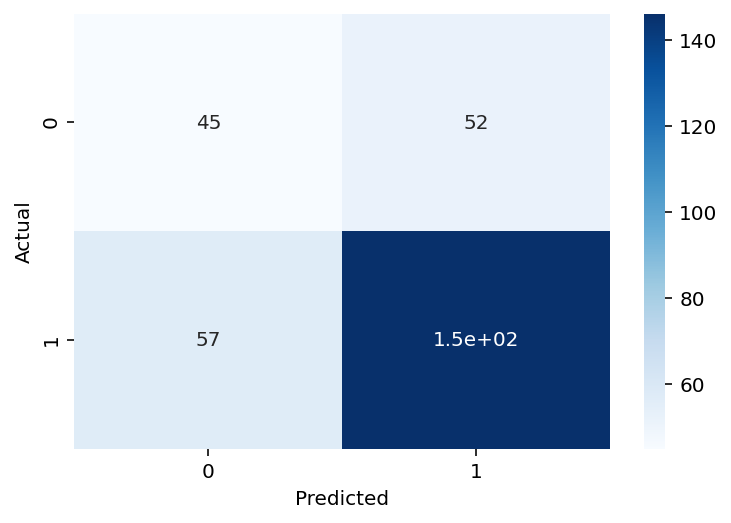

In [43]:
# 혼동행렬 시각화
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
# Decision Tree 모델의 파라미터
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [45]:
# 중요도 확인
df = pd.DataFrame()
df['Features'] = list(x)
df['importance'] = model.feature_importances_
df

,Features,importance
0,CreditDuration,0.117331
1,CreditAmount,0.150920
2,Age,0.115866
3,AccountBalance_2,0.018248
4,AccountBalance_3,0.114045
5,Payment_1,0.015751
6,Payment_2,0.015033
7,Payment_3,0.017910
8,Payment_4,0.015751
9,Purpose_1,0.018097


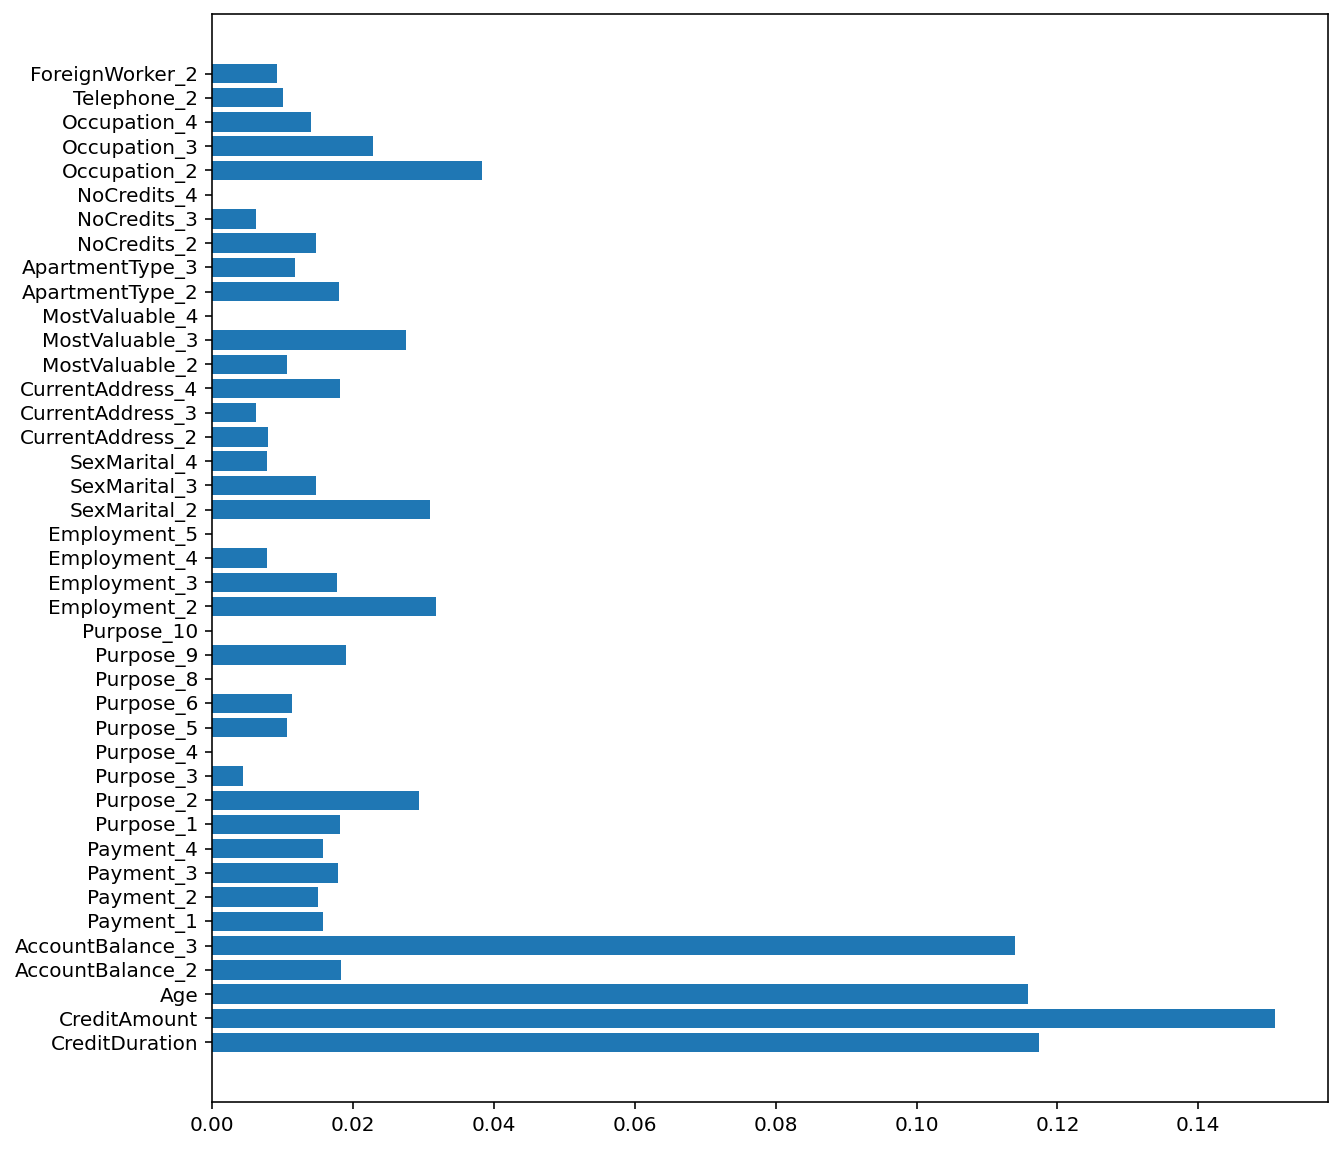

In [46]:
# 중요도 시각화
plt.figure(figsize=(10,10))
plt.barh(list(x), model.feature_importances_)
plt.show()

In [47]:
# 성능 정보 수집
from sklearn.metrics import accuracy_score


score['DecisionTree'] = accuracy_score(y_test, y_pred)

- Decision Tree 모델은 분석과정이 직관적이고, 이해하기 쉽지만 깊이(Depth)가 커지면 새로운 데이터를 적용하기 곤란하고 가장 중요한 단점인 예측 오차의 수치가 높아지는 경우가 있다.
- 그러므로 깊이(Depth)를 적절하게 조정하여 모델을 분석해야 할 것이다.

### 4.2.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 높은 중요도**

- 가장 높은 중요도를 보인 변수는 CreditAmount이다.
    - CreditAmount는 신청한 대출 금액으로 고객의 신용도를 측정하는 가장 중요도가 높은 변수로 작용하였다.
    - 신청한 대출 금액이 크다는 것은 여러가지 변수들을 고려하여 대출 금액을 상환할 수 있는 능력이 충분히 갖춰져 있는 것으로 판단하여 신용도 측정에 큰 영향을 끼친 것으로 판단된다.

**2) 낮은 accuracy 정확도**

- 다른 모델들과 비교하여 accuracy가 가장 낮게 측정되었다.
    - max_depth를 설정하지 않은 이유도 있을 것이다. max_depth를 설정하면 결과가 달라질 수도 있을 것이다.

## 4.3.KNN

### 4.3.1.모델링

- KNN 알고리즘을 사용해 모델링을 진행합니다.

In [48]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [50]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [51]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [52]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 31  66]
 [ 30 173]]
              precision    recall  f1-score   support

           0       0.51      0.32      0.39        97
           1       0.72      0.85      0.78       203

    accuracy                           0.68       300
   macro avg       0.62      0.59      0.59       300
weighted avg       0.65      0.68      0.66       300



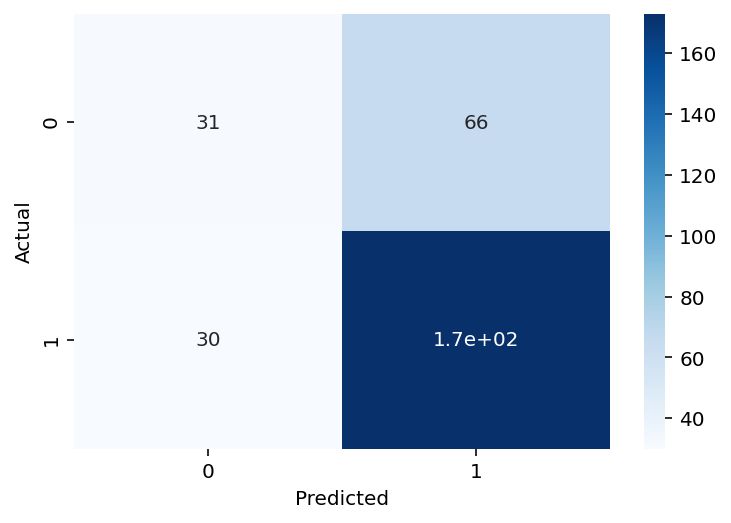

In [53]:
# 혼동행렬 시각화
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
# KNN 모델의 파라미터
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [55]:
# 성능 정보 수집
from sklearn.metrics import accuracy_score


score['KNN'] = accuracy_score(y_test, y_pred)

- KNN 모델 분석은 예측 시점에 기존 데이터와의 거리를 계산하므로 별도의 모델 학습이 필요없고 거리, 횟수, 점수와 같은 숫자로 구분된 속성에 우수한 성능을 보인다.
- 하지만 데이터 하나를 예측할 때마다 전체 데이터와의 거리를 계산하니 예측 속도가 느리고 오직 가까운 이웃을 통해 예측하므로 예측 값이 지역 정보에 많이 편향될 수 있는 단점이 있다.
- k 개수가 적거나 예외적인 데이터 가 이웃을 존재 시 예측 값이 틀릴 가능성이 높다.
- accuracy 값이 0.68이고 1에 대한 precision, recall에 비해 0에 대한 precision, recall이 눈에 띄게 작은 분석 결과를 보인다.

### 4.3.2.모델 탐색(1가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) n_neighbors 파라미터**

- 파라미터 설정
    - 모델링 할 때에는 n_neighbors 파라미터를 설정하지 않고 모델링을 실행하였지만 파라미터를 설정하고 튜닝했을 때는 더 높은 정확도를 측정할 것이라고 생각한다.

## 4.4.Random Forest

### 4.4.1.모델링

- Random Forest 알고리즘을 사용해 모델링을 진행합니다.

In [56]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier

In [57]:
# 선언하기
model = RandomForestClassifier(random_state=2022)

In [58]:
# 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [59]:
# 예측하기
y_pred = model.predict(x_test)


In [60]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 39  58]
 [ 28 175]]
              precision    recall  f1-score   support

           0       0.58      0.40      0.48        97
           1       0.75      0.86      0.80       203

    accuracy                           0.71       300
   macro avg       0.67      0.63      0.64       300
weighted avg       0.70      0.71      0.70       300



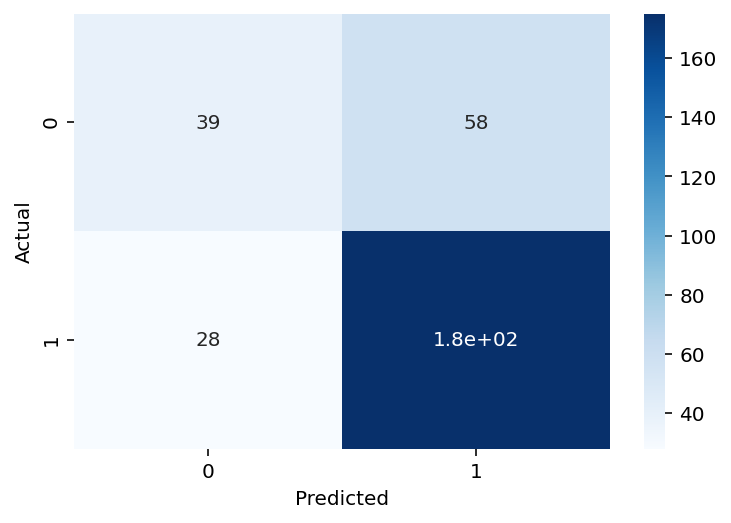

In [61]:
# 혼동행렬 시각화
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
# Random Forest 모델의 파라미터
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2022,
 'verbose': 0,
 'warm_start': False}

In [63]:
# 중요도 확인
df = pd.DataFrame()
df['Features'] = list(x)
df['importance'] = model.feature_importances_
df

,Features,importance
0,CreditDuration,0.103845
1,CreditAmount,0.141894
2,Age,0.113910
3,AccountBalance_2,0.023506
4,AccountBalance_3,0.085919
5,Payment_1,0.011917
6,Payment_2,0.017998
7,Payment_3,0.013422
8,Payment_4,0.024353
9,Purpose_1,0.011626


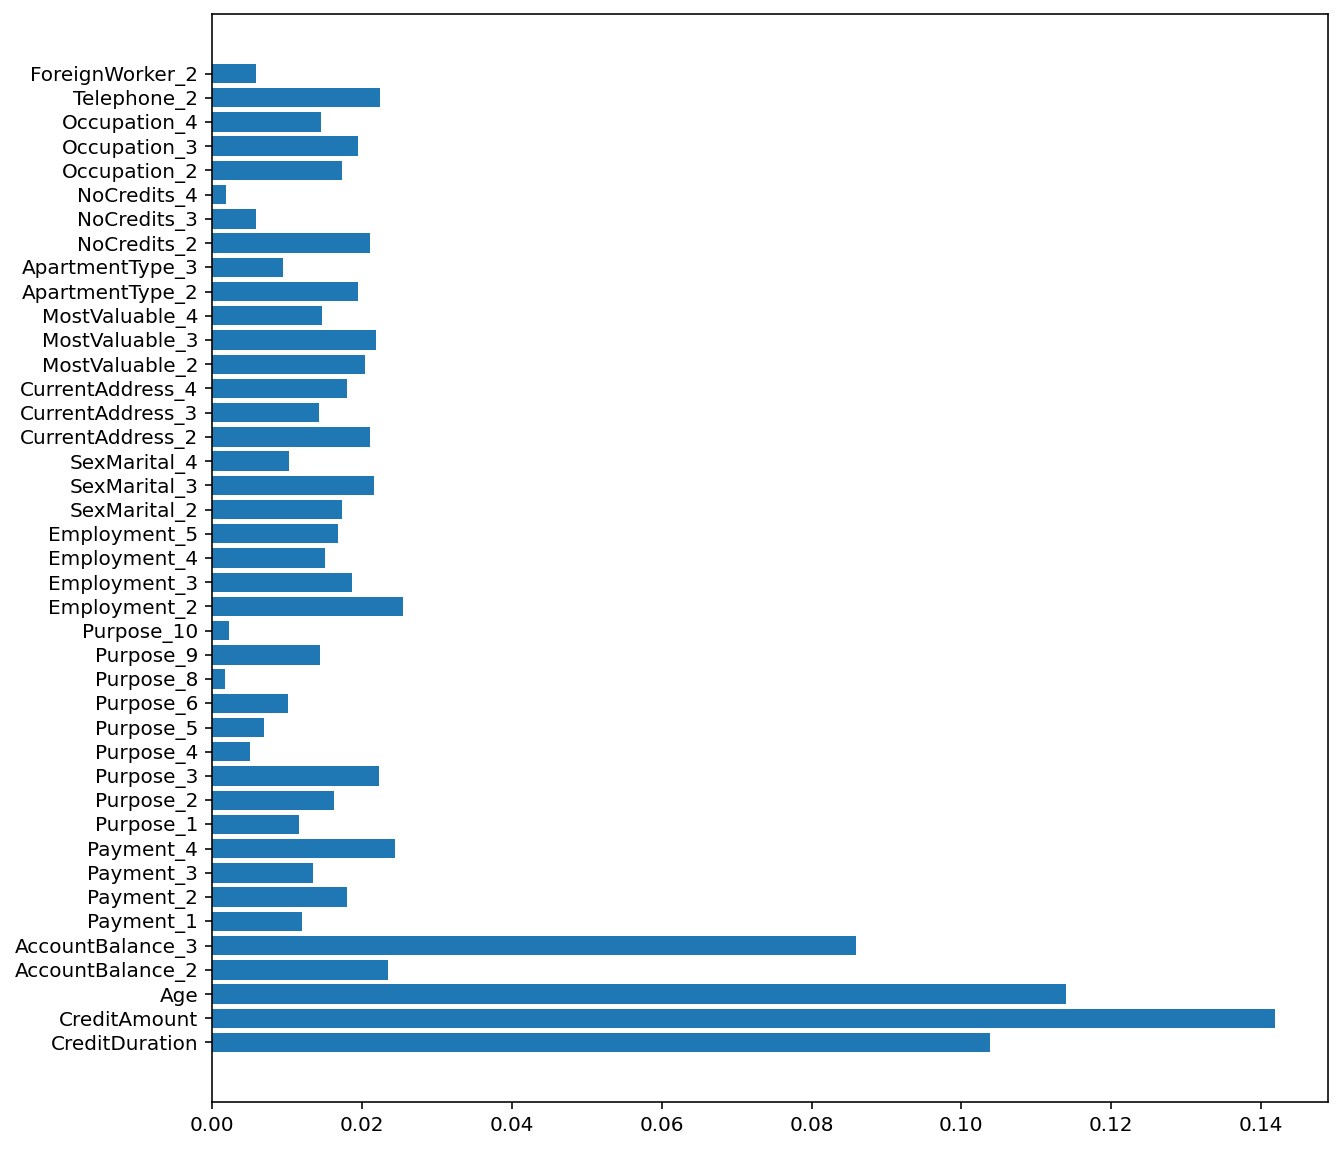

In [64]:
# 중요도 시각화
plt.figure(figsize=(10,10))
plt.barh(list(x), model.feature_importances_)
plt.show()

In [65]:
# 성능 정보 수집
from sklearn.metrics import accuracy_score


score['Random Forest'] = accuracy_score(y_test, y_pred)

- Random Forest 모델분석은 Decision Tree 모델의 주요 단점인 학습 데이터에 과대적합되는 경향을 보완, 해결 하는 방법이다.
- 앙상블 모델 방식으로 단일 모델에 비해 높은 정확도를 얻을 수 있어 Decision Tree, KNN 모델보다는 accracy 정확도가 높게 분석되었지만 Logistic Regression 모델 분석보다 accuracy가 낮게 측정 되었다.
- max_depth를 적절하게 설정하여 튜닝을 해서 정확도를 높일 수 있도록 수행해봐야 한다.

### 4.4.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 높은 중요도**


- 가장 높은 중요도를 보인 변수는 CreditAmount이다.
    - 앞선 Decision Tree 모델과 같이 CreditAmount는 신청한 대출 금액으로 고객의 신용도를 측정하는 가장 중요도가 높은 변수로 작용하였다.

**2) Age 변수**

- 두번째로 높은 중요도를 보인 변수는 Age이다.
    - 젊은 나이대의 고객들의 비해 나이가 있는 고객들의 수입 상황이나 직장 근속연수 등의 여러가지 이유로 높은 나이대의 고객들의 신용도가 더 높게 측정 되었을 것이라고 예상한다.

**2) AccountBalacne 변수**

- AccountBalacne 변수에 대한 중요도 합은 Age 변수의 중요도 보다 높다.
    - AccountBalacne는 가변수화를 통해 변수를 나누어 모델링을 진행하였다. 따라서 AccountBalacn_2, AccountBalacne_3의 중요도를 합하면 Age의 변수 중요도보다 높다.

## 4.5.XGBoost

### 4.5.1.모델링

- XGBoost 알고리즘을 사용해 모델링을 진행합니다.

In [66]:
# 1단계: 불러오기
from xgboost import XGBClassifier

In [67]:
# 2단계: 선언하기
model = XGBClassifier(random_state=2022)

In [68]:
# 3단계: 학습하기
model.fit(x_train, y_train)

[17:38:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [70]:
# 5단계: 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 52  45]
 [ 42 161]]
              precision    recall  f1-score   support

           0       0.55      0.54      0.54        97
           1       0.78      0.79      0.79       203

    accuracy                           0.71       300
   macro avg       0.67      0.66      0.67       300
weighted avg       0.71      0.71      0.71       300



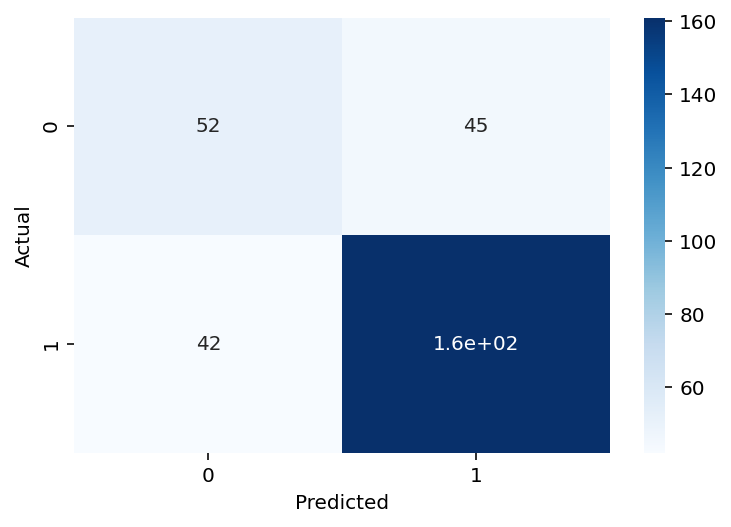

In [71]:
# 혼동행렬 시각화
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [72]:
# XGBoost 모델의 파라미터
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2022,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [73]:
# 중요도 확인
df = pd.DataFrame()
df['Features'] = list(x)
df['importance'] = model.feature_importances_
df


,Features,importance
0,CreditDuration,0.028024
1,CreditAmount,0.022977
2,Age,0.021688
3,AccountBalance_2,0.024276
4,AccountBalance_3,0.113620
5,Payment_1,0.088833
6,Payment_2,0.011947
7,Payment_3,0.019915
8,Payment_4,0.023429
9,Purpose_1,0.034426


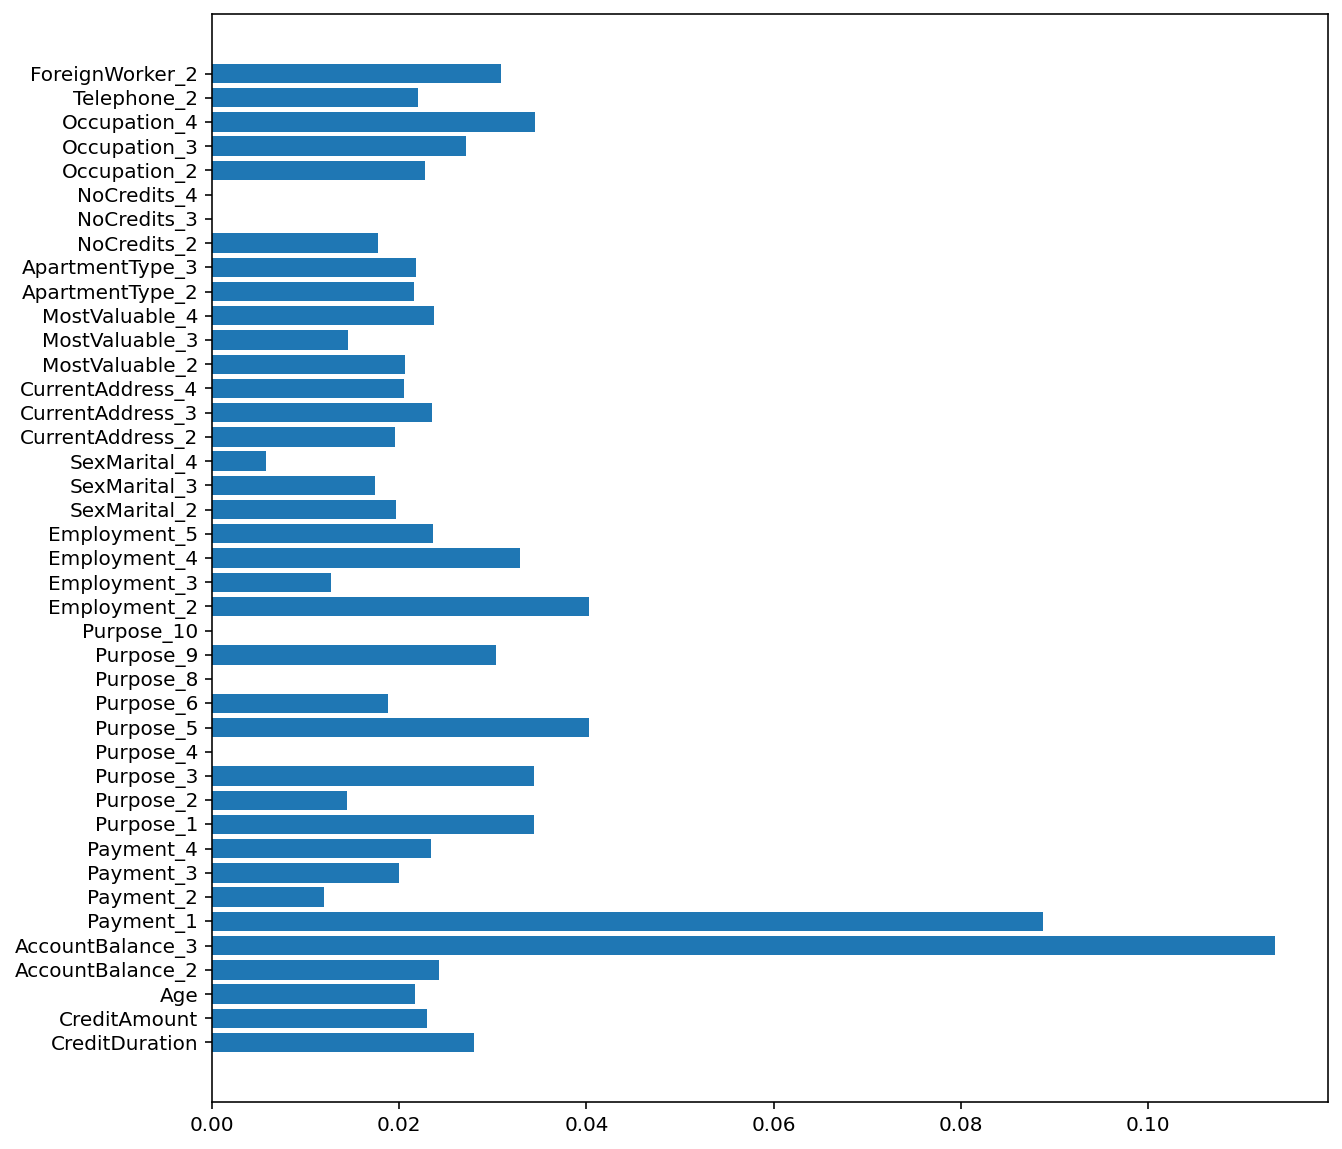

In [74]:
# 중요도 시각화
plt.figure(figsize=(10,10))
plt.barh(list(x), model.feature_importances_)
plt.show()

In [75]:
# 성능 정보 수집
from sklearn.metrics import accuracy_score


score['XGBoost'] = accuracy_score(y_test, y_pred)

- XHBoost 모델 분석은 boosting 기법을 이용하여 구현한 알고리즘으로 과적합 규제가 가능하여 강한 내구성을 지니는 장점이 있다.
- 전체 accuracy 정확도는 0.71로 측정되었다.

### 4.5.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 높은 중요도**

- 가장 높은 중요도를 보인 변수는 AccountBalance이다.
    - 고객들이 가진 은행 잔고가 신용도 측정에 크게 작용한 것이다.
    - 은행 잔고가 많을 수록 고객의 금전적인 상황을 방증하는 지표로 작용할 수 있기에 높은 중요도를 보인 것으로 생각한다.

**2) 파라미터 튜닝**

- 파라미터를 튜닝해서 더 높은 정확도를 나타낼 수 있을 것이라고 생각한다.
    - max_depth를 튜닝하면 더 높은 정확도를 나타낼 것이라고 생각한다.

# 5.모델 성능 비교 및 정리

-LogisticRegression: 0.7333
-DecisionTree: 0.6367
-KNN: 0.6800
-Random Forest: 0.7133
-XGBoost: 0.7100


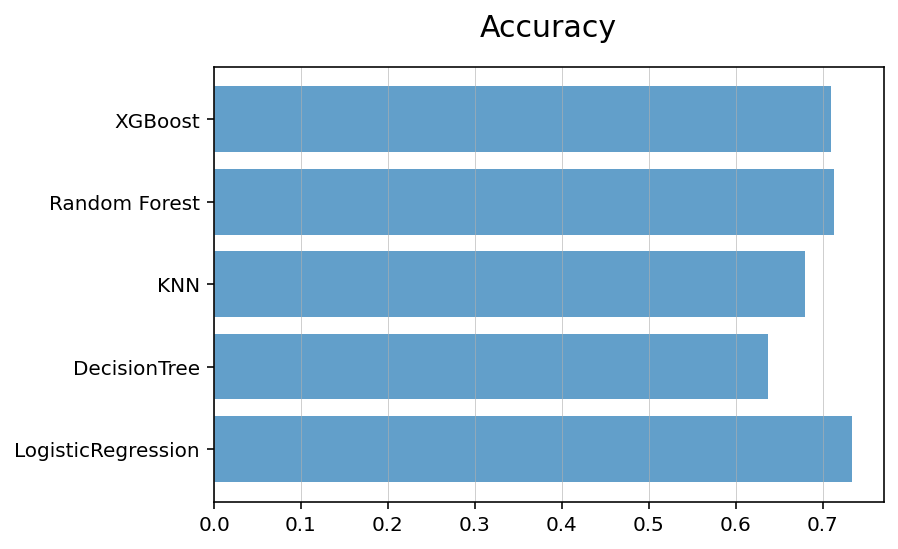

In [76]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시각화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- accuracy 정확도가 가장 높은 모델은0.73으로 Logistic Regression으로 측정되었다.
- 반대로 가장 낮은 모델은 0.64로 Decision Tree 모델이었다
- 전체적으로 0에 대한 precision, recall이 낮게 측정되었다. 이는 0과 1에 대한 불균형 데이터의 원인으로 생각된다.
- 불균형 데이터를 개선하기 위해서는 Over Sampling, Under Sampling이 필요하다.

# 6.성능 튜닝(1개 이상)

- 특정 알고리즘의 모델을 튜닝 대상으로 정하고 나름의 방법으로 모델 성능을 높여봅니다.

## 6.1.GridSerch튜닝 - RandomForestClassifier

### 6.1.1.튜닝

In [77]:
# RandomForest 모델 Grid Search 튜닝
# 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 파라미터 선언
rand_param = {'max_depth' : range(1, 51)}

# 선언하기
model_dst = RandomForestClassifier(random_state=2022)

model = GridSearchCV(model_dst,   # 기본 모델
                          rand_param,   # 파라미터 변수
                          cv=10,        # cv 값(K-Fold Cross Validation의 분할 수)
                          n_jobs=-1) # 성능 기준

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 37  60]
 [ 27 176]]
              precision    recall  f1-score   support

           0       0.58      0.38      0.46        97
           1       0.75      0.87      0.80       203

    accuracy                           0.71       300
   macro avg       0.66      0.62      0.63       300
weighted avg       0.69      0.71      0.69       300



In [78]:
# 성능 정보 수집
from sklearn.metrics import accuracy_score

score['Random Forest_tune'] = accuracy_score(y_test, y_pred)

In [79]:
print(model.best_params_)
print(model.best_score_)

{'max_depth': 12}
0.7685714285714285


- max_depth를 1부터 50까지 설정하여 튜닝하였다.

### 6.1.2.튜닝 결과

- 튜닝 결과 최선의 max_depth 값은 12이고 최선의 스코어는 0.768로 측정 되었다.

## 6.2.GridSearchCV튜닝 - XGBClassifier

### 6.2.1.튜닝

In [80]:

# 불러오기
from sklearn.model_selection import GridSearchCV

# 변수 선언
param = {'max_depth' : range(1,51)}

# 선언하기
model_tu = XGBClassifier(random_state=2022)
model = GridSearchCV(model_tu,
                    param,
                    cv=10,
                    n_jobs=-1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[17:39:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 47  50]
 [ 33 170]]
              precision    recall  f1-score   support

           0       0.59      0.48      0.53        97
           1       0.77      0.84      0.80       203

    accuracy                           0.72       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.71      0.72      0.72       300



In [81]:
# 성능 정보 수집
from sklearn.metrics import accuracy_score

score['XGBoost_tune'] = accuracy_score(y_test, y_pred)

In [82]:
print(model.best_params_)
print(model.best_score_)

{'max_depth': 1}
0.7514285714285714


- max_depth를 1부터 50까지 설정하여 튜닝하였다.

### 6.2.2.튜닝 결과

- 튜닝 결과 최선의 max_depth 값은 11이고 최선의 스코어는 0.751로 측정 되었다.

## 성능 정보 시각화

-LogisticRegression: 0.7333
-DecisionTree: 0.6367
-KNN: 0.6800
-Random Forest: 0.7133
-XGBoost: 0.7100
-Random Forest_tune: 0.7100
-XGBoost_tune: 0.7233


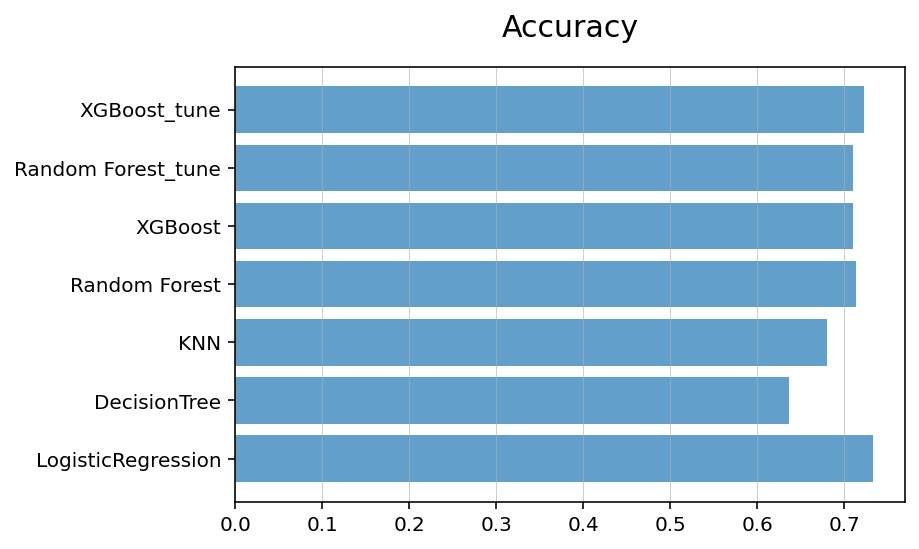

In [83]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시각화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

# 7.종합 정리

- 성능 튜닝에 따라 성능 결과가 달라지고 더 개선되는 모습을 볼 수 있다.
- 그럼에도 불구하고 가장 accuracy가 가장 높은 모델은 LogisticRegression 모델이다.
- 다른 파라미터 튜닝을 통해 성능을 더 높일 수 있는지 확인해 볼 필요가 있다.